# Testing the etmodule Penman-Monteith and Hargraeves methods versus results from Hydrus

The data is taken from example 4: Rassam, D., et al. "The HYDRUS-1D software package for simulating the one-dimensional movement of water, heat, and multiple solutes in variably-saturated media: Tutorial." Commonwealth Sci. Ind. Res. Org. Land and Water, Adelaide, SA (2018).

### Import packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sys
sys.path.append('C:\\Matevz_arbeit\\PyEt')

import pyet as et

### Import meteo data and Hydrus ET calculation

In [2]:
meteo = pd.read_csv("data/hydrus_meteo.txt", index_col=0, delim_whitespace=True)
meteo.index = pd.date_range("2015-01-01 00:00:00", "2016-01-01 00:00:00")
wind = meteo["wind"] * 0.01157  # km/d to m/s
tmax = meteo["tmax"]
tmin = meteo["tmin"]
ta = (tmax+tmin)/2
rh = meteo["rhmean"]
solar = meteo["rad"]  #  [MJ/m2/d]
elevation = 145.93
latitude = -17.94 * 3.141592654 / 180

hydrus_pm = pd.read_csv("data/hydrus_pm.txt", index_col=0, delim_whitespace=True)
hydrus_har = pd.read_csv("data/hydrus_har.txt", index_col=0, delim_whitespace=True)

### Calculate Penman-Monteith with PyEt FAO 1990

In [3]:
pmfao1990 = et.pm_fao1990(wind, elevation, latitude, rs=solar, tmax=tmax,
                                tmin=tmin, rh=rh, croph=0.6)

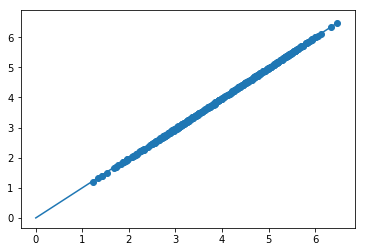

In [4]:
plt.plot(np.linspace(0,np.max(pmfao1990),120),np.linspace(0,np.max(pmfao1990),120))
plt.scatter(pmfao1990,hydrus_pm["ET"])

### Calculate Penman-Monteith with PyEt Penman-Monteith (1965)

In [5]:
pm1965 = et.pm1965(wind, elevation, latitude, rs=solar, tmax=tmax,
                                tmin=tmin, rh=rh)

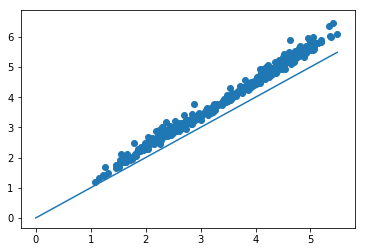

In [6]:
plt.plot(np.linspace(0,np.max(pm1965),120),np.linspace(0,np.max(pm1965),120))
plt.scatter(pm1965,hydrus_pm["ET"])

### Calculate Penman-Monteith with PyEt FAO-56

In [7]:
pmfao56 = et.pm_fao56(wind, elevation, latitude, rs=solar, tmax=tmax,
                                tmin=tmin, rh=rh)

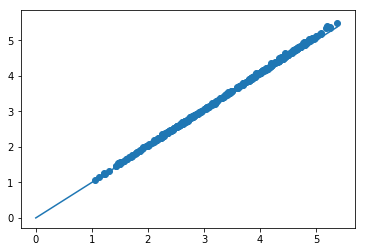

In [8]:
plt.plot(np.linspace(0,np.max(pmfao56),120),np.linspace(0,np.max(pmfao56),120))
plt.scatter(pmfao56,pm1965)

In [9]:
1500/208

7.211538461538462

### Calculate Hargreaves with etmodule

In [10]:
har = et.hargreaves(tmax, tmin, latitude)

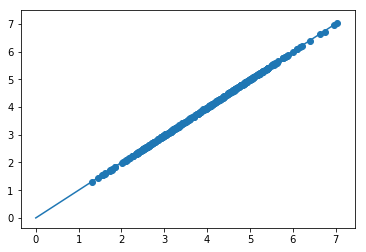

In [11]:
plt.plot(np.linspace(0,np.max(har),120),np.linspace(0,np.max(har),120))
plt.scatter(har,hydrus_har["ET"])

# Hamon

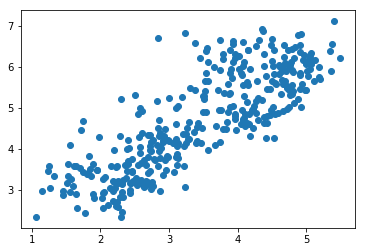

In [12]:
ham = et.hamon(ta, latitude)
plt.scatter(pm1965, ham)

## Penman (1948)

In [13]:
penman = et.penman(wind, elevation, latitude, rs=solar, tmax=tmax,
                                tmin=tmin, rh=rh)

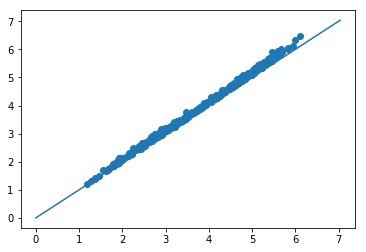

In [14]:
plt.plot(np.linspace(0,np.max(har),120),np.linspace(0,np.max(har),120))
plt.scatter(penman, hydrus_pm["ET"])

## Priestley and Taylor (1972)

In [15]:
pt = et.pt(wind, elevation, latitude, rs=solar, tmax=tmax,
                                tmin=tmin, rh=rh)

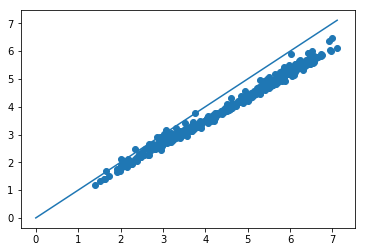

In [16]:
plt.plot(np.linspace(0,np.max(pt),120),np.linspace(0,np.max(pt),120))
plt.scatter(pt, hydrus_pm["ET"])

## Kimberly–Penman (Wright, 1982)

In [17]:
kpm = et.kpm(wind, elevation, latitude, rs=solar, tmax=tmax,
                                tmin=tmin, rh=rh)

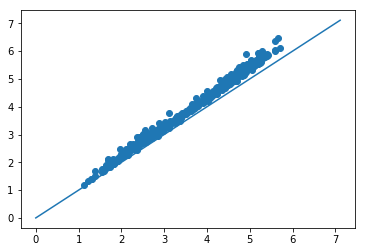

In [18]:
plt.plot(np.linspace(0,np.max(pt),120),np.linspace(0,np.max(pt),120))
plt.scatter(kpm, hydrus_pm["ET"])

## Jensen and Haise (1963)

In [19]:
jh = et.jh(tmax, tmin, solar)

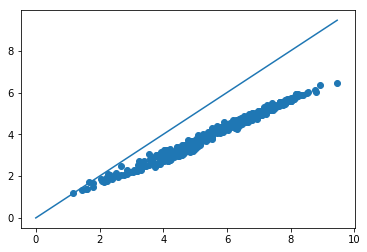

In [20]:
plt.plot(np.linspace(0,np.max(jh),120),np.linspace(0,np.max(jh),120))
plt.scatter(jh, hydrus_pm["ET"])

## Makkink (1957)

In [22]:
mk = et.mk(tmax, tmin, solar, elevation)

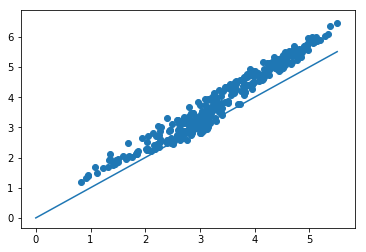

In [23]:
plt.plot(np.linspace(0,np.max(mk),120),np.linspace(0,np.max(mk),120))
plt.scatter(mk, hydrus_pm["ET"])